Dataset Shape: (1000, 5)
Churn Rate: 0.31


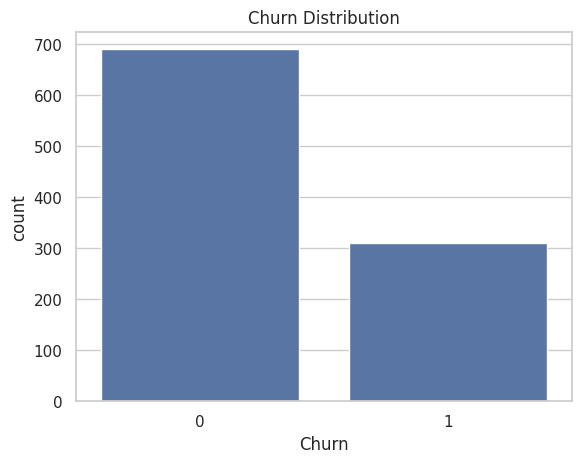

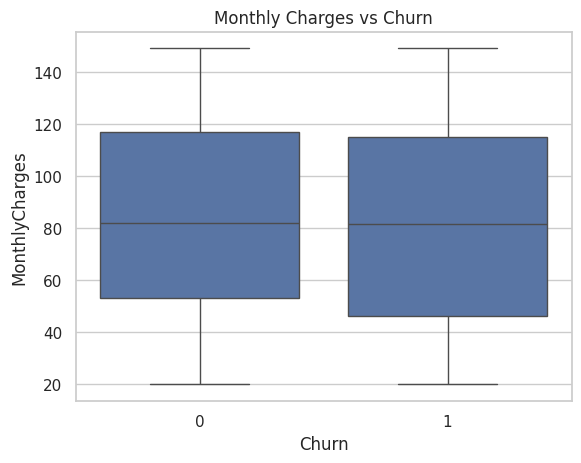

Model Accuracy: 0.735


In [1]:
# ================================
# CUSTOMER CHURN ANALYSIS PROJECT
# ================================

!pip install pandas numpy matplotlib seaborn scikit-learn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

sns.set(style="whitegrid")
np.random.seed(42)

# -----------------------
# 1. Generate Dataset
# -----------------------

n = 1000

df = pd.DataFrame({
    "Age": np.random.randint(18, 70, n),
    "MonthlyCharges": np.random.randint(20, 150, n),
    "Tenure": np.random.randint(1, 72, n),
    "ContractType": np.random.choice([0,1], n),  # 0=Monthly, 1=Yearly
    "Churn": np.random.choice([0,1], n, p=[0.7,0.3])
})

df.to_csv("churn_data.csv", index=False)

print("Dataset Shape:", df.shape)
print("Churn Rate:", df["Churn"].mean())

# -----------------------
# 2. Visualization
# -----------------------

plt.figure()
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

plt.figure()
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

# -----------------------
# 3. Simple ML Model
# -----------------------

X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression()
model.fit(X_train, y_train)

preds = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, preds))